In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo',start='2007-01-01')['Adj Close']

In [6]:
data.tail()

,PG
Date,
2017-10-20,88.250000
2017-10-23,87.300003
2017-10-24,86.980003
2017-10-25,86.860001
2017-10-27,87.040001


In [17]:
# log_rets_1 = np.log(data / data.shift(1))
# log_rets_2 = np.log(data.pct_change() + 1)
log_returns = np.log(data.pct_change()+1)

In [18]:
log_returns.tail()

,PG
Date,
2017-10-20,-0.037148
2017-10-23,-0.010823
2017-10-24,-0.003672
2017-10-25,-0.001381
2017-10-27,0.002070


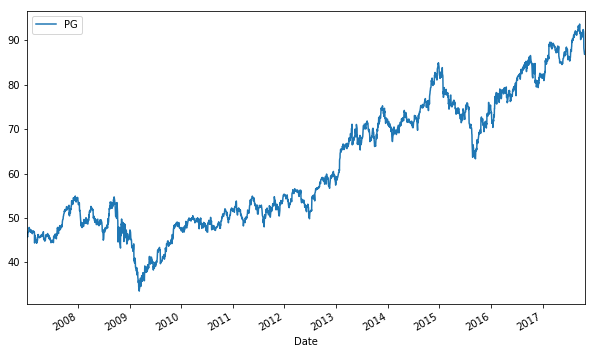

In [19]:
data.plot(figsize=(10,6))

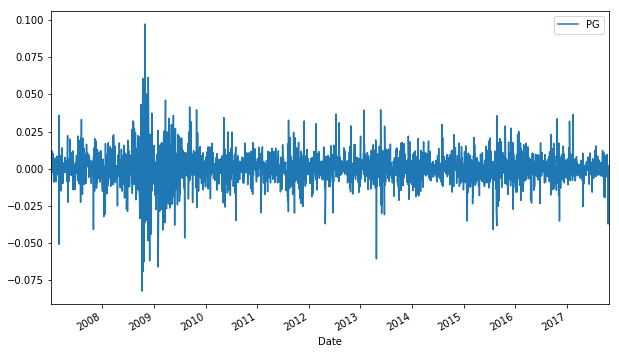

In [20]:
log_returns.plot(figsize=(10,6))

In [21]:
u = log_returns['PG'].mean()
u

0.00023013819747663147

In [26]:
var = log_returns['PG'].var()
var

0.00011996433101282809

In [27]:
drift = u - (0.5*var)
drift

0.0001701560319702174

In [25]:
stdev = log_returns['PG'].std()
stdev

0.010952822970030515

In [29]:
# Brownian Motion
# r = drift + stdev * e**r

In [36]:
stats.norm.ppf(0.95)

1.6448536269514722

In [34]:
x = np.random.rand(10,2)
x

array([[ 0.73455866,  0.45945181],
       [ 0.98282529,  0.17840776],
       [ 0.81951966,  0.46918846],
       [ 0.06048171,  0.05742314],
       [ 0.0399806 ,  0.02445534],
       [ 0.61331248,  0.8532402 ],
       [ 0.45827201,  0.36040773],
       [ 0.96488491,  0.54795057],
       [ 0.33400472,  0.58889555],
       [ 0.1902031 ,  0.6325191 ]])

In [35]:
stats.norm.ppf(x)

array([[ 0.62665917, -0.10181488],
       [ 2.11594571, -0.92145002],
       [ 0.91353607, -0.07731003],
       [-1.55074241, -1.57677942],
       [-1.75091125, -1.96936943],
       [ 0.28796302,  1.05043185],
       [-0.10478801, -0.35736917],
       [ 1.81042318,  0.12048514],
       [-0.42888154,  0.22470483],
       [-0.8771481 ,  0.33853269]])

In [38]:
Z = stats.norm.ppf(np.random.rand(10,2))
Z

array([[-1.08311715, -0.15881408],
       [ 1.66062297,  1.70108776],
       [-0.55410022, -0.60381649],
       [-1.11165507, -1.68948199],
       [ 2.11129348,  0.37076047],
       [ 0.53863024,  1.31544237],
       [ 0.4058707 ,  0.21650686],
       [-1.61918452,  0.34260667],
       [-0.74753372, -0.82752583],
       [ 1.47586205,  0.04740744]])

In [40]:
t_intervals = 1000
iterations = 10

In [41]:
# daily_returns = e**r
# r = drift + stdev * Z
daily_returns = np.exp(drift + stdev*stats.norm.ppf(np.random.rand(t_intervals, iterations)))

In [42]:
daily_returns

array([[ 1.00270565,  1.00275717,  0.980975  , ...,  0.99942601,
         1.00249854,  1.00611379],
       [ 1.00140778,  1.01978902,  1.00209247, ...,  1.00575218,
         0.9989786 ,  0.99038937],
       [ 1.00747807,  1.0053055 ,  0.97741118, ...,  1.00124917,
         0.99157639,  1.0114549 ],
       ..., 
       [ 0.99951997,  1.00172799,  0.99917998, ...,  1.0102235 ,
         1.0171421 ,  0.99113695],
       [ 0.99967847,  1.00567023,  0.99788367, ...,  0.98999391,
         1.01080891,  1.01117251],
       [ 1.00366197,  1.00487164,  0.96895075, ...,  1.01441127,
         0.99775017,  0.99497635]])

In [51]:
S0 = data.iloc[-1][0]
S0

87.040001000000004

In [45]:
price_list = np.zeros_like(daily_returns)

In [46]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
price_list[0] = S0

In [54]:
price_list

array([[ 87.040001,  87.040001,  87.040001, ...,  87.040001,  87.040001,
         87.040001],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [55]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [56]:
price_list

array([[  87.040001  ,   87.040001  ,   87.040001  , ...,   87.040001  ,
          87.040001  ,   87.040001  ],
       [  87.1625344 ,   88.76243727,   87.22212968, ...,   87.540671  ,
          86.95109796,   86.20349191],
       [  87.8143422 ,   89.23336664,   85.25188498, ...,   87.65002445,
          86.21865615,   87.1909443 ],
       ..., 
       [  71.5711827 ,   78.23406121,  149.89622882, ...,  143.68451588,
          99.1196918 ,   85.9317901 ],
       [  71.54817027,   78.67766627,  149.57899933, ...,  142.24679499,
         100.19106803,   86.89186384],
       [  71.81017781,   79.06095564,  144.93468338, ...,  144.29675261,
          99.96565548,   86.45534974]])

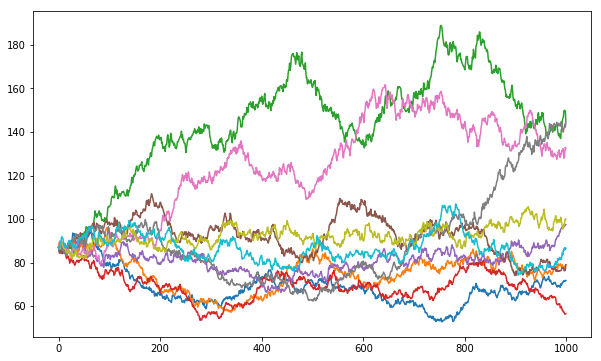

In [57]:
plt.figure(figsize=(10,6))
plt.plot(price_list);